# Statistics

In [1]:
import os

In [2]:
COMBINATIONS_ENTITY_FILE = '../query/questions/collected_queries_combinations.csv'
COMBINATIONS_REPO_FILE = 'statistics/github_repos_combinations.csv'
COMBINATIONS_ALL_FILE = 'statistics/github_repos_entities.csv'

## The number of notebooks

In [2]:
# Count the number of notebooks
def count_ipynb_files(directory):
    count = 0
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.ipynb'):
                count += 1
    return count

# Example usage
directory = 'notebook_contents'
count = count_ipynb_files(directory)
print(f'Number of .ipynb files in {directory}: {count}')


Number of .ipynb files in notebook_contents: 5613


## The number of repos and entities

In [6]:
import pandas as pd

# Load the first CSV file into a Pandas data frame
df1 = pd.read_csv(COMBINATIONS_ENTITY_FILE)

# Load the second CSV file into a Pandas data frame
df2 = pd.read_csv(COMBINATIONS_REPO_FILE)

# Merge the two data frames using a common column, in this case, the 'query' column
merged_df = pd.merge(df1, df2, on='query')

# Save the merged data frame to a new CSV file named 'merged_file.csv'
merged_df.to_csv(COMBINATIONS_ALL_FILE, index=False)


## Plot the repo numbers grouped by num_entities

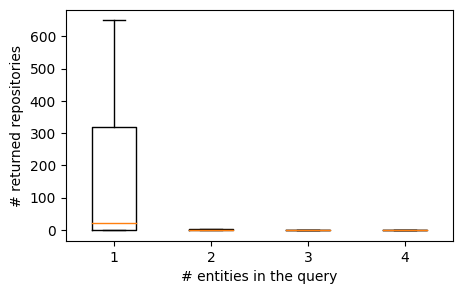

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv(COMBINATIONS_ALL_FILE)

# drop rows where 'value' column equals 1
df = df[df['num_entities'] != -1]

# Group the data by the number of entities
grouped = df.groupby('num_entities')

# Generate the box plot
fig, ax = plt.subplots(figsize=(5, 3))
ax.boxplot([grouped.get_group(name)['repo_count'] for name in grouped.groups], showfliers=False, sym='')

# Set the x-axis labels and title
ax.set_xticklabels(grouped.groups.keys())
ax.set_xlabel('# entities in the query')
ax.set_ylabel('# returned repositories')
# ax.set_title('Repository Counts by Entity Combinations')

# Save the plot to a file
plt.savefig('statistics/repo_count_by_num_entities.png', bbox_inches='tight')
